# Benchmark framework plots
All experiments conducted with a total of 29 AWS EC2 instances, all located in eu-west-1 region, divided as follow:
- 22 validators 
- 7 clients

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [3]:
sns.set(style="whitegrid", rc={'figure.figsize':(5.5, 2.5)}, font_scale=0.8)

In [4]:
plt.rcParams['pdf.fonttype'] = 42

In [5]:
columns_by_height = ['nodes', 'faults', 'protocol', 'tbt', 'rate', 'ghp', 'tx_size', 'height', 'blocksize', 'request_latency', 'preprepare_latency',  'pbft_time', 'roast_time', 'bitcoin_time'] 
columns_aggregated = ['nodes','faults', 'protocol', 'tbt', 'rate', 'ghp', 'tx_size', 'execution_time', 'warmup_time','consensus_blocks','consensus_block_latency','consensus_block_latency_std','latency_fh','cum_pbft_time', 'cum_roast_time', 'cum_bitcoin_time']

## Configuration A:

In [6]:
## Chart 1-2-3 bench params
configA = 'Duration: 60s\n \
Faults: 0\n \
Genesis hours in the past: 15h \n \
Rate: 0tx/s\n \
Runs:3\n \
Target block time: 10s\n \
Warmup duration: 30s'

print(configA)

Duration: 60s
 Faults: 0
 Genesis hours in the past: 15h 
 Rate: 0tx/s
 Runs:3
 Target block time: 10s
 Warmup duration: 30s


### Plot 2: Latency comparison PBFT vs FBFT 

count       18.000000
mean     17015.022172
std        816.396346
min      16171.350956
25%      16422.413230
50%      16682.831526
75%      17490.159392
max      19237.098932
Name: preprepare_latency, dtype: float64

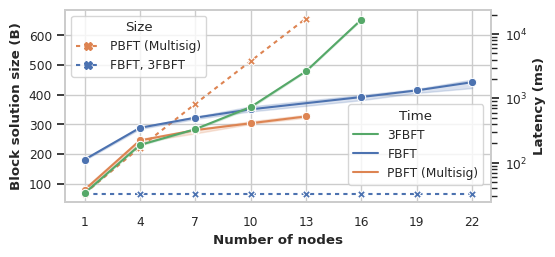

In [37]:
GEO_DISTRIBUTED=True

if GEO_DISTRIBUTED:
  files_chart_1_multiregion_by_height = ['./results/bench-throughput-latency-comparison-geographycally-distributed-20-01-2023-by-height.csv']
  df_chart_1_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_chart_1_multiregion_by_height), ignore_index=True)
else:
  files_chart_1_by_height = ['./results/chart-1-2-16-12-2022-by-height.csv']
  df_chart_1_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_chart_1_by_height), ignore_index=True)

## Chart 2
## Latency comparison PBFT vs FBFT
# data=df_chart_1_by_height.copy()
data=df_chart_1_by_height.copy()
data['preprepare_latency'] = data['preprepare_latency'] * 1000

columns = ['max_failures','nodes','protocol','block_sig_size_bytes','block_size_nosig','block_size_sig'] 
all_files = glob.glob("./results/signature_overhead*.csv")
df2 = pd.concat((pd.read_csv(f, names=columns, header=0) for f in all_files), ignore_index=True)

# First axis
fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.5)

p = sns.lineplot(x="nodes",
        y="block_sig_size_bytes",
        hue="protocol",
        hue_order=['ROAST', 'NAIVE'],
        style="protocol",
        dashes={'ROAST': (2,2), 'NAIVE': (2,2) },
        markers={'ROAST': 'X', 'NAIVE': 'X'},
        data=df2,
        ax=ax)

ax.set_ylabel("Block solution size (B)", fontdict={'weight': 'bold'})
ax.set_xlabel("Number of nodes", fontdict={'weight': 'bold'})

# Second axis
ax2 = ax.twinx()
ax2.grid(False)
g = sns.lineplot(x="nodes",
                    y="preprepare_latency",
                    hue="protocol",
                    hue_order = ['ROAST', 'NAIVE', 'THREEFBFT'],
                    estimator=np.median,
#                     errorbar='sd',
                    marker="o",
                    data=data,
                    err_kws={'label': '_nolegend_'},
                    ax=ax2)
ax2.set_yscale('log')
g.set_xticks(range(1, 23, 3))
ax2.set_ylabel("Latency (ms)", fontdict={'weight': 'bold'})

# Adding legend to protocol
# ax.add_legend(title="Size", label_order = ['THREEFBFT', 'fbft', 'pbft'])
handles=p.get_legend_handles_labels()[0]
order = [1,0]
l1 = p.legend([handles[idx] for idx in order], ['PBFT (Multisig)', 'FBFT, 3FBFT'], title="Size")
# l1.get_texts()[0].set_text('5FBFT, 3FBFT')
# l1.get_texts()[1].set_text('PBFT (Multisig)')
l1.get_frame().set_linewidth(0.0)
l1.get_frame().set_edgecolor('b')
sns.move_legend(p, "upper left", bbox_to_anchor=(0, 1))

# l2 = g.legend(title="Time", labels=['5FBFT', 'PBFT (Multisig)', '3FBFT'])
handles=g.get_legend_handles_labels()[0]
order = [2,0,1]
l2 = g.legend([handles[idx] for idx in order], ['3FBFT', 'FBFT', 'PBFT (Multisig)', ], title="Time")
sns.move_legend(g, "center left", bbox_to_anchor=(0.65, 0.30))


if GEO_DISTRIBUTED:
  fig.savefig('/home/ubuntu/overleaf-itcoin-dlt23/img/exp/chart-1-latency-geographically.pdf', bbox_inches='tight')
else:
  fig.savefig('./plots/chart-1-latency-locally.pdf', bbox_inches='tight')

data.loc[(data['protocol'] == 'ROAST') & (data['nodes'] == 22)]['preprepare_latency'].describe()
data.loc[(data['protocol'] == 'THREEFBFT') & (data['nodes'] == 16)]['preprepare_latency'].describe()

### Plot 3: FBFT  Throughput

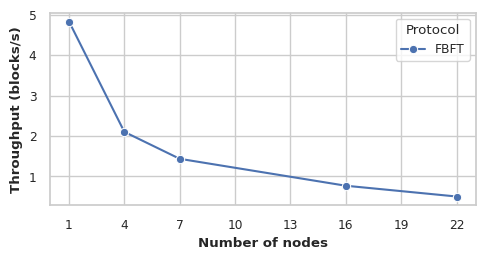

In [115]:
GEO_DISTRIBUTED=True

if GEO_DISTRIBUTED:
  files_chart_1_multiregion_by_height = ['./results/bench-throughput-latency-comparison-geographycally-distributed-20-01-2023-by-height.csv']
  df_chart_1_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_chart_1_multiregion_by_height), ignore_index=True)
  data=df_chart_1_by_height[(df_chart_1_by_height.protocol=='ROAST')].copy()
else:
  files_chart_1_by_height = ['./results/chart-1-2-16-12-2022-by-height.csv']
  df_chart_1_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_chart_1_by_height), ignore_index=True)
  data=df_chart_1_by_height[(df_chart_1_by_height.protocol=='fbft')].copy()


## Chart: Throughput of FBFT
# Runs isthe number of times block 500 appears

EXP_DURATION=60
EXP_WARMUP=30

df_nodes_height=data[['nodes', 'height']].groupby(by=['nodes']).median()
df_nodes_height.rename(columns={"height": "med_height"}, inplace=True)
df_nodes_height.head()
df_nodes_runs = data.join(df_nodes_height, on='nodes')
df_nodes_runs = df_nodes_runs[df_nodes_runs['height']==df_nodes_runs['med_height']]
df_nodes_runs = df_nodes_runs.groupby(by=['nodes']).count()
df_nodes_runs = df_nodes_runs[['med_height']]
df_nodes_runs.rename(columns={"med_height": "runs"}, inplace=True)

data=data[['nodes','faults']]
data = data.groupby(by=['nodes'], as_index=False).count()
data.rename(columns={"faults": "consensus_blocks"}, inplace=True)
data =  data.join(df_nodes_runs, on='nodes')
data.loc[:,'consensus_blocks'] = data['consensus_blocks']/(EXP_DURATION-EXP_WARMUP)/data['runs']
data.loc[:,'simulation_type'] = 'FBFT'

data_labels = ['FBFT']

fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.5)
g = sns.lineplot(
  x="nodes",
  y="consensus_blocks",
  hue="simulation_type",
  marker="o",
  errorbar='sd',
  err_kws={'label': '_nolegend_'},
  data=data,
  ax=ax
)
g.set_xticks(range(1, 23, 3))
g.legend(title="Protocol", labels=data_labels)
ax.set_xlabel("Number of nodes", fontdict={'weight': 'bold'})
ax.set_ylabel("Throughput (blocks/s)", fontdict={'weight': 'bold'})

if GEO_DISTRIBUTED:
  fig.savefig('/home/ubuntu/overleaf-itcoin-dlt23/img/exp/chart-2-throughput-geographically.pdf', bbox_inches='tight')
else:
  fig.savefig('./plots/chart-2-throughput-locally.pdf', bbox_inches='tight')


## Configuration B:

In [ ]:
## Chart 3 bench params
configB = 'Duration: 300s\n \
Genesis hours in the past: -0.01h \n \
Rate: 0tx/s\n \
Runs:3\n \
Target block time: 60s\n \
Fault time: 60s \n \
Warmup duration: 30s'
print(configB)

## Plot 3: Recovery latency (at fault height)

In [10]:
GEO_DISTRIBUTED=True

if GEO_DISTRIBUTED:
  files_fault_by_height = ['./results/bench-failures-geographically-distributed-10-02-2023-by-height.csv']
  files_fault_aggregated = ['./results/bench-failures-geographically-distributed-10-02-2023.csv']
else:
  files_fault_by_height = ['./results/chart-3-bench-16-12-2022-by-height.csv']
  files_fault_aggregated = ['./results/chart-3-bench-16-12-2022.csv']
  

df_fault_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_fault_by_height), ignore_index=True) 
df_fault_aggregated = pd.concat((pd.read_csv(f, names=columns_aggregated, header=0) for f in files_fault_aggregated), ignore_index=True)

df_aggregated = df_fault_aggregated
df_aggregated['protocol'] = df_aggregated['protocol'].replace('fbft','ROAST')

df_aggregated.head()

,nodes,faults,protocol,tbt,rate,ghp,tx_size,execution_time,warmup_time,consensus_blocks,consensus_block_latency,consensus_block_latency_std,latency_fh,cum_pbft_time,cum_roast_time,cum_bitcoin_time
0,22,3,ROAST,60,0.0,-0.01,4096,295,30,0.01888,41165,53417,123757,10.253253,3.887262,0.028538
1,22,2,ROAST,60,0.0,-0.01,4096,297,30,0.01876,15199,26821,63147,8.405778,3.736665,0.027338
2,22,1,ROAST,60,0.0,-0.01,4096,295,30,0.01884,8811,13983,33818,8.960662,4.172281,0.029244
3,19,3,ROAST,60,0.0,-0.01,4096,298,30,0.01864,39922,53306,122713,7.933308,3.006119,0.024651
4,19,2,ROAST,60,0.0,-0.01,4096,298,30,0.01864,14516,26559,62003,7.213713,2.591741,0.028603


With 4 nodes
count     1.000
mean     30.644
std         NaN
min      30.644
25%      30.644
50%      30.644
75%      30.644
max      30.644
Name: latency_fh, dtype: float64
With 10 nodes
count      3.000000
mean      71.347000
std       46.168698
min       31.158000
25%       46.132500
50%       61.107000
75%       91.441500
max      121.776000
Name: latency_fh, dtype: float64
With 19 nodes
count      3.000000
mean      72.321667
std       46.106290
min       32.249000
25%       47.126000
50%       62.003000
75%       92.358000
max      122.713000
Name: latency_fh, dtype: float64
With 22 nodes
count      3.000000
mean      73.574000
std       45.867174
min       33.818000
25%       48.482500
50%       63.147000
75%       93.452000
max      123.757000
Name: latency_fh, dtype: float64


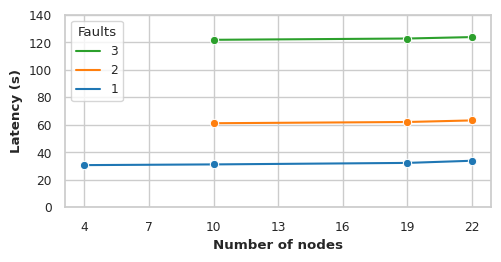

In [11]:
## Chart 3

## Recovery latency (at fault height)
data=df_aggregated[(df_aggregated.faults!=0) & (df_aggregated.rate==0)  & (df_aggregated.protocol=='ROAST') & (df_aggregated.warmup_time==30) & (df_aggregated.ghp==-0.01) & (df_aggregated.tbt==60)]
data['latency_fh'] = data['latency_fh']/1000
fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.5)
g = sns.lineplot(x="nodes",
                    y="latency_fh",
                    hue="faults",
                    errorbar='sd', 
                    marker='o',
                    data=data,
                    palette='tab10',
                    ax=ax)
g.set_xticks(range(4, 23, 3))
g.set_ylim((0, 140))
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="Faults")
ax.set_xlabel("Number of nodes", fontdict={'weight': 'bold'})
ax.set_ylabel("Latency (s)", fontdict={'weight': 'bold'})


if GEO_DISTRIBUTED:
  fig.savefig('/home/ubuntu/overleaf-itcoin-dlt23/img/exp/chart-3-failures-geographically.pdf', bbox_inches='tight')
else:
  fig.savefig('./plots/chart-3-failures-locally.pdf', bbox_inches='tight')

print("With 4 nodes")
print( data.loc[(data['protocol'] == 'ROAST') & (data['nodes'] == 4)]['latency_fh'].describe() ) 
print("With 10 nodes")
print( data.loc[(data['protocol'] == 'ROAST') & (data['nodes'] == 10)]['latency_fh'].describe() )  
print("With 19 nodes")
print( data.loc[(data['protocol'] == 'ROAST') & (data['nodes'] == 19)]['latency_fh'].describe() )
print("With 22 nodes")
print( data.loc[(data['protocol'] == 'ROAST') & (data['nodes'] == 22)]['latency_fh'].describe() )

## Configuration C:

In [85]:
## Chart 5 bench params
configC = 'Protocol: FBFT\n \
Duration: 300s\n \
Faults: 0\n \
Genesis hours in the past: 1h\n \
Runs:2\n \
Target block time: 20s\n \
Tx size: 16384B\n \
Warmup duration: 150s'
print(configC)

Protocol: FBFT
 Duration: 300s
 Faults: 0
 Genesis hours in the past: 1h
 Runs:2
 Target block time: 20s
 Tx size: 16384B
 Warmup duration: 150s


### Plot 4: FBFT Latency under load

In [12]:
GEO_DISTRIBUTED = True

if not GEO_DISTRIBUTED:
  # USE THIS FOR INTRANET DISTRIBUTED
  TBT=20
  files_load_by_height = ['./results/load-chart-bench-17-12-2022-by-height.csv']
  files_load_aggregated = ['./results/load-chart-bench-17-12-2022.csv']
  df_load_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_load_by_height), ignore_index=True) 
  df_load_aggregated = pd.concat((pd.read_csv(f, names=columns_aggregated, header=0) for f in files_load_aggregated), ignore_index=True) 
else:
  # USE THIS FOR GEO DISTRIBUTED
  TBT=60
  files_load_by_height = ['./results/bench-load-geographically-distributed-02-2023-by-height.csv']
  df_load_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_load_by_height), ignore_index=True)
  # Filter out experiments in which the load has not been properly generated
  df_load_by_height = df_load_by_height.loc[
    # 0%
    (df_load_by_height['rate'] == 0) & (df_load_by_height['blocksize'] <= 50000 ) |
    # 25%
    (df_load_by_height['rate'] == 0.23) & (df_load_by_height['blocksize'] >= 350000 ) & (df_load_by_height['blocksize'] <= 550000 ) |
    # 50%
    (df_load_by_height['rate'] == 0.46) & (df_load_by_height['blocksize'] >= 850000 ) & (df_load_by_height['blocksize'] <= 1050000 ) |
    # 75% is 1350, 
    (df_load_by_height['rate'] == 0.68) & (df_load_by_height['blocksize'] >= 1300000 ) & (df_load_by_height['blocksize'] <= 1400000 ) |
    # 100%
    (df_load_by_height['rate'] == 2) & (df_load_by_height['blocksize'] >= 1700000 ) 
  ]

df_load_by_height

,nodes,faults,protocol,tbt,rate,ghp,tx_size,height,blocksize,request_latency,preprepare_latency,pbft_time,roast_time,bitcoin_time
1,4,0,ROAST,60,2.00,0.5,15000,34,1707831,8.977242,8.940066,7.588545,2.673004,0.882015
2,4,0,ROAST,60,2.00,0.5,15000,35,1784014,11.545985,11.490729,7.705282,5.142295,0.866313
3,4,0,ROAST,60,2.00,0.5,15000,36,1774186,10.321409,10.290488,7.658552,3.956786,0.862492
13,4,0,ROAST,60,0.68,0.5,32768,41,1317580,8.773521,8.682627,7.274729,2.471184,0.776155
14,4,0,ROAST,60,0.68,0.5,32768,42,1393111,9.457148,9.362671,7.689568,2.746453,0.799296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,10,0,ROAST,60,0.00,0.5,32768,37,16303,1.868690,1.819704,1.186162,0.654058,0.018639
172,10,0,ROAST,60,0.00,0.5,32768,38,16304,1.975452,1.918466,1.272352,0.661464,0.017504
173,10,0,ROAST,60,0.00,0.5,32768,39,16304,2.016405,1.952223,1.340545,0.627142,0.016340
174,10,0,ROAST,60,0.00,0.5,32768,40,16303,2.164058,2.106985,1.443630,0.678801,0.016174


count     9.000000
mean     11.364933
std       1.198813
min       8.940066
25%      11.196461
50%      11.490729
75%      11.905983
max      12.995138
Name: preprepare_latency, dtype: float64


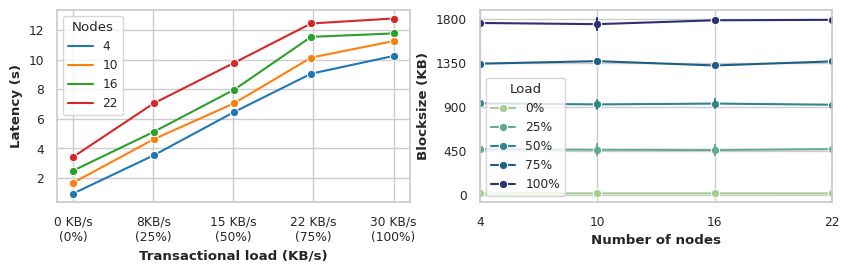

In [13]:
## Chart 4
## FBFT Latency under load + Blocksize
data=df_load_by_height.copy()
data['load'] = data['rate'] * data['tx_size'] / 1000
data['blocksize'] = data['blocksize'] / 1000

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 2.5)

g = sns.lineplot(x="load",
                    y="preprepare_latency",
#                     estimator=np.median,
                    hue="nodes",
                    palette='tab10',
                    data=data,
                    errorbar=None, 
                    # errorbar= ('sd'),
                    marker='o',
                    ax=ax1)
g.legend(title="Nodes", loc="upper left")
g.set_xticks([0, 1.8*1000*0.25/TBT, 1.8*1000*0.50/TBT, 1.8*1000*0.75/TBT, 1.8*1000/TBT])
g.set_xticklabels(['0 KB/s\n(0%)', f'{1.8 * 1000 * 0.25/TBT:.0f}KB/s\n(25%)', f'{1.8 * 1000 * 0.50/ TBT:.0f} KB/s\n(50%)', f'{1.8 * 1000 * 0.75/ TBT:.0f} KB/s\n(75%)', f'{1.8 * 1000/ TBT:.0f} KB/s\n(100%)'], rotation=0)
ax1.set_xlabel("Transactional load (KB/s)", fontdict={'weight': 'bold'})
ax1.set_ylabel("Latency (s)", fontdict={'weight': 'bold'})
#ax1.axhline(y=60, color='black', linestyle='-', label=r"$y=60$")
#trans = transforms.blended_transform_factory(ax1.get_yticklabels()[0].get_transform(), ax1.transData)
#ax1.text(0,60, "60", color="black",ha="right", va="center", transform=trans)

p = sns.lineplot(x='nodes',
    y = 'blocksize',
#     estimator=np.median,
    data=data,
    palette="crest",
    marker='o',
    errorbar='sd',
    err_style='bars',
    hue='load',
    ax=ax2)
p.set_xticks([4, 10, 16, 22])
p.set_xlim((4,22))
p.set_yticks([0, 450, 900, 1350, 1800])
p.legend(title="Load", loc="lower left", labels = ['0%', '25%', '50%', '75%', '100%'])
ax2.set_xlabel("Number of nodes", fontdict={'weight': 'bold'})
ax2.set_ylabel("Blocksize (KB)", fontdict={'weight': 'bold'})

print(data[data['load'] == 30]['preprepare_latency'].describe())


/tmp/ipykernel_8623/146195316.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data= data.groupby(['load'])['pbft_time','roast_time','bitcoin_time'].mean().reset_index()


,load,pbft_time,roast_time,bitcoin_time,total_time,pbft_perc,roast_perc,bitcoin_perc
0,0.00000,1.395476,0.765093,0.019129,2.179699,64.021531,35.100881,0.877588
1,7.53664,3.708374,1.871169,0.262153,5.841696,63.481124,32.031257,4.487619
2,15.07328,5.739604,2.683078,0.493229,8.915910,64.374853,30.093143,5.532004
3,22.28224,8.304352,3.664247,0.762494,12.731094,65.228899,28.781871,5.989230
4,30.00000,8.810412,3.868795,0.858884,13.538091,65.078687,28.577109,6.344204


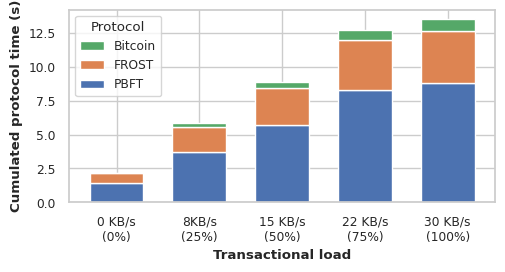

In [22]:
## Chart 5
# Protocol dominance - 16 nodes
data=df_load_by_height
data['load'] = data['rate'] * data['tx_size'] / 1000

data= data.groupby(['load'])['pbft_time','roast_time','bitcoin_time'].mean().reset_index()
col_list = ['pbft_time','roast_time','bitcoin_time']
fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.5)

data.plot(x='load', kind='bar', stacked=True, ax = ax, width=0.65)
ax.set_xlabel("Transactional load", fontdict={'weight': 'bold'})
ax.set_xticklabels(['0 KB/s\n(0%)', f'{1.8 * 1000 * 0.25/TBT:.0f}KB/s\n(25%)', f'{1.8 * 1000 * 0.50/ TBT:.0f} KB/s\n(50%)', f'{1.8 * 1000 * 0.75/ TBT:.0f} KB/s\n(75%)', f'{1.8 * 1000/ TBT:.0f} KB/s\n(100%)'], rotation=0)
ax.set_ylabel("Cumulated protocol time (s)", fontdict={'weight': 'bold'})


handles, labels = plt.gca().get_legend_handles_labels()
labels = ['PBFT', 'FROST', 'Bitcoin']
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="Protocol")

if GEO_DISTRIBUTED:
  fig.savefig('/home/ubuntu/overleaf-itcoin-dlt23/img/exp/chart-5-dominance-geographically.pdf', bbox_inches='tight')  
else:
  fig.savefig('./plots/chart-5-dominance-intraregion.pdf', bbox_inches='tight')  

data["total_time"] = data[col_list].sum(axis=1)
data["pbft_perc"] = data["pbft_time"]/data["total_time"]*100
data["roast_perc"] = data["roast_time"]/data["total_time"]*100
data["bitcoin_perc"] = data["bitcoin_time"]/data["total_time"]*100
data

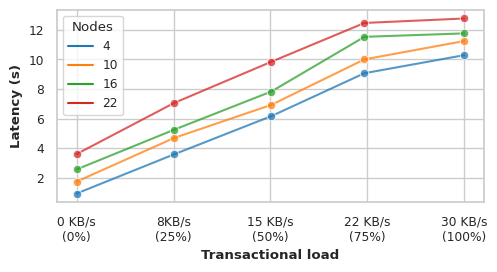

In [21]:
# Chart 4
# FBFT Latency under load 
data=df_load_by_height.copy()
data['load'] = data['rate'] * data['tx_size'] / 1000
data['blocksize'] = data['blocksize'] / 1000

fig, ax = plt.subplots()

data.loc[data['load'] == 68.8, 'load'] = 82.8

fig.set_size_inches(5.5, 2.5)
g = sns.lineplot(x="load",
                    y="preprepare_latency",
                    hue="nodes",
                    estimator="median",
                    palette='tab10',
                    data=data,
                    errorbar=None, #'sd',
                    alpha=0.75,
                    marker='o',
                    ax=ax)
g.legend(title="Nodes", loc="upper left")
# g.set_xticks([0, 7.5, 15, 22, 29.5])
g.set_xticks([0, 1.8*1000*0.25/TBT, 1.8*1000*0.50/TBT, 1.8*1000*0.75/TBT, 1.8*1000/TBT])
ax.set_xticklabels(['0 KB/s\n(0%)', f'{1.8 * 1000 * 0.25/ TBT:.0f}KB/s\n(25%)', f'{1.8 * 1000 * 0.50/ TBT:.0f} KB/s\n(50%)', f'{1.8 * 1000 * 0.75/ TBT:.0f} KB/s\n(75%)', f'{1.8 * 1000/ TBT:.0f} KB/s\n(100%)'], rotation=0)
ax.set_xlabel("Transactional load", fontdict={'weight': 'bold'})
ax.set_ylabel("Latency (s)", fontdict={'weight': 'bold'})
ax.tick_params(axis='x', which='minor', pad=15)

if GEO_DISTRIBUTED:
  fig.savefig('/home/ubuntu/overleaf-itcoin-dlt23/img/exp/chart-4-load-geographically.pdf', bbox_inches='tight')
else:
  fig.savefig('./plots/chart-4-load-locally.pdf', bbox_inches='tight')

## DISCONTINUED PLOTS

### Old way to get data from CSV

In [13]:
files_chart_1_by_height = ['./results/chart-1-2-16-12-2022-by-height.csv']
files_chart_1_aggregated = ['./results/chart-1-2-16-12-2022.csv']

files_fault_by_height = ['./results/chart-3-bench-16-12-2022-by-height.csv']
files_fault_aggregated = ['./results/chart-3-bench-16-12-2022.csv']

files_load_by_height = ['./results/load-chart-bench-17-12-2022-by-height.csv']
files_load_aggregated = ['./results/load-chart-bench-17-12-2022.csv']

files_chart_1_multiregion_by_height = ['./results/chart-1-2-bench-20-01-2023-by-height.csv']
files_chart_1_multiregion_aggregated = ['./results/chart-1-2-bench-20-01-2023.csv']


df_chart_1_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_chart_1_by_height), ignore_index=True)
df_chart_1_aggregated = pd.concat((pd.read_csv(f, names=columns_aggregated, header=0) for f in files_chart_1_aggregated), ignore_index=True)
df_fault_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_fault_by_height), ignore_index=True) 
df_fault_aggregated = pd.concat((pd.read_csv(f, names=columns_aggregated, header=0) for f in files_fault_aggregated), ignore_index=True)
df_load_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_load_by_height), ignore_index=True) 
df_load_aggregated = pd.concat((pd.read_csv(f, names=columns_aggregated, header=0) for f in files_load_aggregated), ignore_index=True) 

df_chart_1_multiregion_by_height = pd.concat((pd.read_csv(f, names=columns_by_height, header=0) for f in files_chart_1_multiregion_by_height), ignore_index=True)
df_chart_1_multiregion_aggregated = pd.concat((pd.read_csv(f, names=columns_aggregated, header=0) for f in files_chart_1_multiregion_aggregated), ignore_index=True)

# Original throughput calculation using aggregated data

In [ ]:
## Chart 1
## Throughput comparison PBFT vs FBFT
data=df_aggregated[(df_aggregated.protocol=='fbft') & (df_aggregated.faults==0) & (df_aggregated.rate==0) & (df_aggregated.ghp==15) & (df_aggregated.tbt==10)]
fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.5)
#g = sns.boxplot(x='nodes',y = 'consensus_blocks',data=df,showfliers=False,palette="muted",hue='protocol', dodge =False, ax=ax)
g = sns.lineplot(x="nodes",
                y="consensus_blocks",
                hue="protocol",
                marker="o",
                errorbar='sd',
                data=data,
                ax=ax)
g.set_xticks(range(1, 23, 3))
g.legend(title="Protocol", labels=['FBFT'])
ax.set_xlabel("Number of nodes", fontdict={'weight': 'bold'})
ax.set_ylabel("Throughput (blocks/s)", fontdict={'weight': 'bold'})
fig.savefig('./plots/chart-1.pdf', bbox_inches='tight')

### Plot 1: Throughput comparison PBFT vs FBFT 

In [ ]:
## Chart 1
## Throughput comparison PBFT vs FBFT
series_1_df=df_chart_1_multiregion_aggregated[(df_chart_1_multiregion_aggregated.protocol=='fbft')]
series_1_label='fbft'
series_1_df.loc[:,'simulation_type'] = series_1_label

series_2_df=df_chart_1_multiregion_aggregated[(df_chart_1_multiregion_aggregated.protocol=='pbft')]
series_2_label='pbft'
series_2_df.loc[:,'simulation_type'] = series_2_label

series_3_df=df_chart_1_multiregion_aggregated[(df_chart_1_multiregion_aggregated.protocol=='THREEFBFT')]
series_3_label='3fbft'
series_3_df.loc[:,'simulation_type'] = series_3_label

data = pd.concat([series_1_df, series_2_df, series_3_df])

fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.5)
g = sns.lineplot(x="nodes",
                y="consensus_blocks",
                hue="simulation_type",
                marker="o",
                errorbar='sd',
                err_kws={'label': '_nolegend_'},
                data=data,
                ax=ax)
g.set_xticks(range(1, 23, 3))
g.legend(title="Type", labels=[series_1_label, series_2_label, series_3_label])
ax.set_xlabel("Number of nodes", fontdict={'weight': 'bold'})
ax.set_ylabel("Throughput (blocks/s)", fontdict={'weight': 'bold'})
fig.savefig('./plots/chart-1.pdf', bbox_inches='tight')

### Plot: Comparison remote vs local

In [ ]:
## Chart 2 - bis
## Latency comparison PBFT vs FBFT (single VS multi region)
single_region_df=df_chart_1_by_height.copy()
single_region_df.loc[:,'simulation_type'] = 'single_region'
multi_region_df=df_chart_1_multiregion_by_height.copy()
multi_region_df.loc[:,'simulation_type'] = 'multi_region'

data = pd.concat([single_region_df, multi_region_df])
data['preprepare_latency'] = data['preprepare_latency'] * 1000
fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.5)

g = sns.lineplot(x="nodes",
                y="preprepare_latency",
                hue=data[['protocol', 'simulation_type']].apply(tuple, axis=1),
                hue_order=[('fbft', 'single_region'), ('pbft', 'single_region'), ('fbft', 'multi_region'), ('pbft', 'multi_region')],
                errorbar='sd',
                marker="o",
                data=data,
                err_kws={'label': '_nolegend_'},
                ax=ax)

g.set_xticks(range(1, 23, 3))
g.legend(title="Time", loc="lower right", bbox_to_anchor=(0.99, 0.01), labels=['FBFT, single region', 'PBFT, single region', 'FBFT, multi-region','PBFT, multi-region'])

ax.set_xlabel("Number of nodes", fontdict={'weight': 'bold'})
ax.set_ylabel("Latency (ms)", fontdict={'weight': 'bold'})

fig.savefig('./plots/chart-2-bis.pdf',bbox_inches='tight')